In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("disease_prediction_dataset_10000_rows_23_columns.csv")

print("Shape:", df.shape)
df.head()

Shape: (4311, 23)


,fever,cough,fatigue,headache,sore_throat,chills,sweating,vomiting,sneezing,itching,...,diarrhea,stomach_pain,sensitivity_to_light,joint_pain,body_ache,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,1,0,1,1,0,0,1,0,0,0,...,0,0,0,1,0,Dengue,Avoid mosquito bites,Stay hydrated,Take proper rest,Consult doctor immediately
1,1,1,1,1,1,0,0,0,0,0,...,0,1,0,0,0,Flu,Rest well,Drink warm fluids,Take paracetamol,Consult doctor if severe
2,1,1,1,1,1,0,1,0,0,0,...,0,0,0,0,0,Flu,Rest well,Drink warm fluids,Take paracetamol,Consult doctor if severe
3,1,0,1,1,1,0,0,0,0,0,...,0,1,0,1,0,Dengue,Avoid mosquito bites,Stay hydrated,Take proper rest,Consult doctor immediately
4,1,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,Allergy,Avoid allergens,Take antihistamines,Keep surroundings clean,Consult allergist


In [3]:
print("\nNull Values:\n", df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())


Null Values:
 fever                   0
cough                   0
fatigue                 0
headache                0
sore_throat             0
chills                  0
sweating                0
vomiting                0
sneezing                0
itching                 0
skin_rash               0
runny_nose              0
nausea                  0
diarrhea                0
stomach_pain            0
sensitivity_to_light    0
joint_pain              0
body_ache               0
Disease                 0
Precaution_1            0
Precaution_2            0
Precaution_3            0
Precaution_4            0
dtype: int64

Duplicate Rows: 0


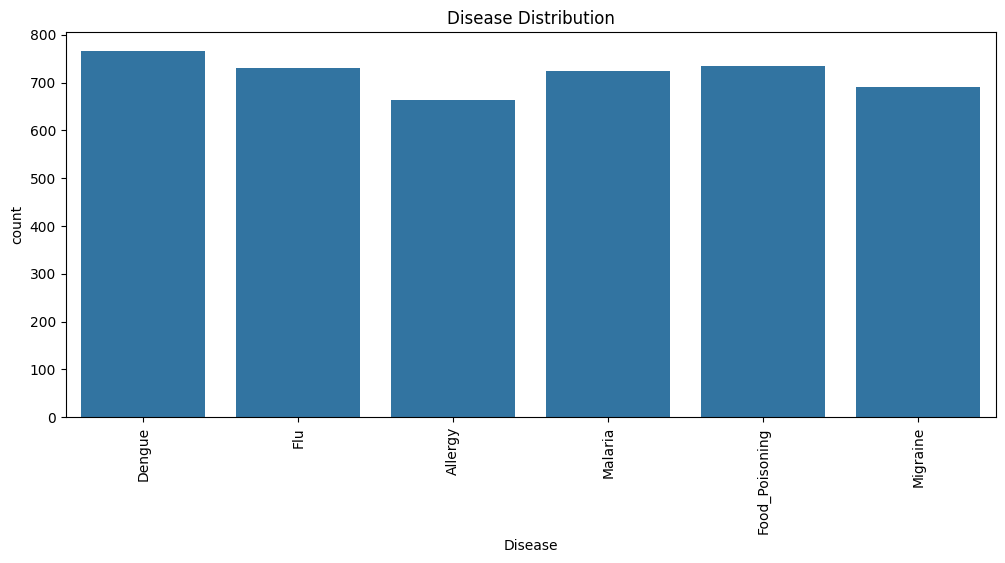

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(x="Disease", data=df)
plt.xticks(rotation=90)
plt.title("Disease Distribution")
plt.show()

In [5]:
X = df.drop(["Disease",
             "Precaution_1",
             "Precaution_2",
             "Precaution_3",
             "Precaution_4"], axis=1)

y = df["Disease"]

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [8]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
print("Logistic Regression Accuracy:",
      accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8586326767091541


In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:",
      accuracy_score(y_test, y_pred_knn))

KNN Accuracy: 0.8122827346465817


In [10]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:",
      accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7925840092699884


In [11]:
print("\nFinal Accuracies:")
print("LR :", accuracy_score(y_test, y_pred_lr))
print("KNN:", accuracy_score(y_test, y_pred_knn))
print("RF :", accuracy_score(y_test, y_pred_rf))


Final Accuracies:
LR : 0.8586326767091541
KNN: 0.8122827346465817
RF : 0.7925840092699884


In [12]:
best_model = lr

In [13]:
def predict_disease(symptom_list):
    
    input_data = np.zeros(len(X.columns))
    
    for symptom in symptom_list:
        if symptom in X.columns:
            index = list(X.columns).index(symptom)
            input_data[index] = 1
    
    input_data = input_data.reshape(1, -1)
    
    prediction = best_model.predict(input_data)
    disease = le.inverse_transform(prediction)
    
    return disease[0]

In [14]:
def get_precautions(disease_name):
    
    precautions = df[df["Disease"] == disease_name][[
        "Precaution_1",
        "Precaution_2",
        "Precaution_3",
        "Precaution_4"
    ]].iloc[0]
    
    return precautions.values

In [16]:
symptoms_input = ["stomach_pain","diarrhea"]

predicted = predict_disease(symptoms_input)

print("Predicted Disease:", predicted)

precautions = get_precautions(predicted)

print("\nPrecautions:")
for p in precautions:
    print("-", p)

Predicted Disease: Food_Poisoning

Precautions:
- Drink ORS
- Avoid solid food temporarily
- Stay hydrated
- Seek medical help if severe


C:\Users\thakr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [17]:
import pickle

In [18]:
with open("disease_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

In [19]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

In [20]:
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)